In [52]:
#Summary
#'irbnb has provided many travellers a great, easy and convenient place to stay during their travels.
#Similarly, it has also given an opportunity for many to earn extra revenue by listing their properties for residents to stay.
# However, with so many listings available with varying prices, how can an aspiring host know what type of property to invest in if his main aim is to list it in Airbnb and earn rental revenu
# Additionally, if a traveller wants to find the cheapest listing available but with certain features he prefers like 'free parking' etc,
# how does he know what aspects to look into to find a suitable listing? There are many factors which influence the price of a listing.
# Which is why we aim to find the most important factors that affect the price and more importantly the features that is common among the most expensive listings.
# This will allow an aspiring Airbnb host to ensure that his listing is equipped with those important features such that he will be able to charge a higher price without losing customers.
# Moreover,a traveller will also know the factors to look into to get the lowest price possible while having certain features he prefers.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
airbnb= pd.read_csv('/Airbnb NYC 2019 (3).csv')

In [7]:
# . head
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# info to check data type and missing value
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
airbnb.isnull() # missing value


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [10]:
# as we can see above null is false  and true for last_review,review per month so  i dropnull value using dropna()
# checking stattical value using describe()
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
#droping null value
airbnb.dropna(subset=['last_review'],axis=0,inplace=True)
airbnb.dropna(subset=['reviews_per_month'],axis=0,inplace=True)
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [13]:
airbnb.astype({'id':'str'},{'host_id':'str'}) # i change data types of id and host id beacuse i am not going to use it as numerical values

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


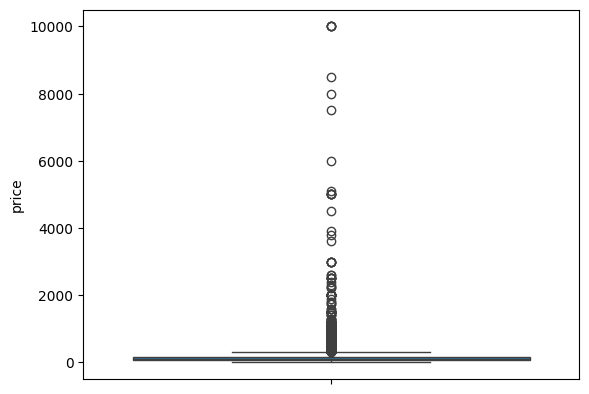

In [17]:
# I use boxplot to show price distribution and identifying iqr
sns.boxplot(y='price',data=airbnb)
plt.show()

In [15]:
# iqr ,upper_limit,lower_limit
a_airbnb=airbnb['price'].quantile(0.75)
b_airbnb=airbnb['price'].quantile(0.25)
iqr_airbnb=a_airbnb-b_airbnb
upper_limit_airbnb=a_airbnb+1.5*iqr_airbnb
lower_limit_airbnb=b_airbnb-1.5*iqr_airbnb
print(upper_limit_airbnb)
print(lower_limit_airbnb)

321.5
-82.5


In [18]:
#mean of price distribution
mean_price=airbnb['price'].mean()
mean_price


142.317946605566

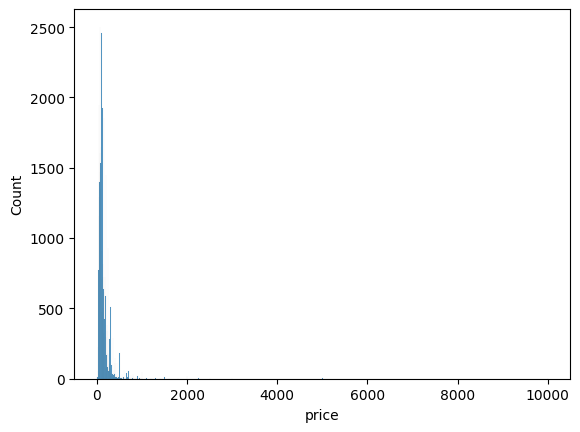

In [19]:
# to show and analyse price distribution i choose histogram to to show distribution of price
sns.histplot(airbnb['price'])
plt.show()

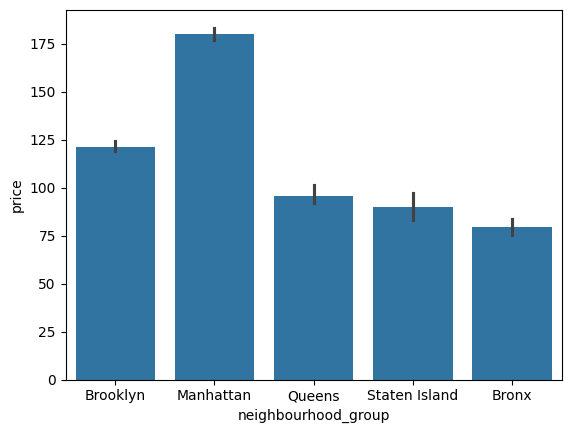

In [ ]:
# to identify costlier neighbourhood i use bargraph to visualize and you can see mahanttan is max costier
sns.barplot(x='neighbourhood_group',y='price',data=airbnb)
xlabel='neighbourhood_group'
ylabel='price'
plt.show()

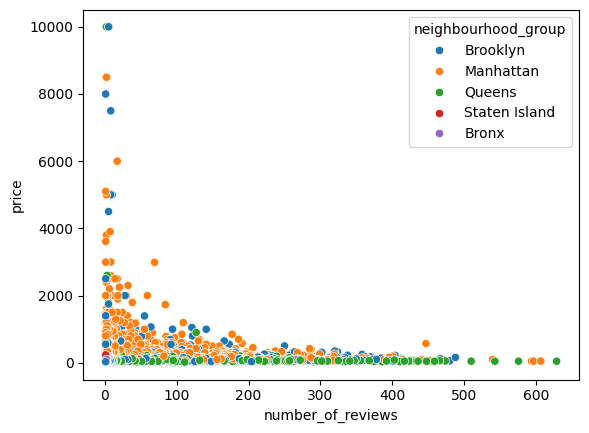

In [ ]:
# i want to show relation with number_of_review and price and color by neighbourhood for better understanding
# you can clearly see manhattan has max no of review and max avg price as orange color is more in no .
sns.scatterplot(x='number_of_reviews',y='price',hue='neighbourhood_group',data=airbnb)
plt.show()

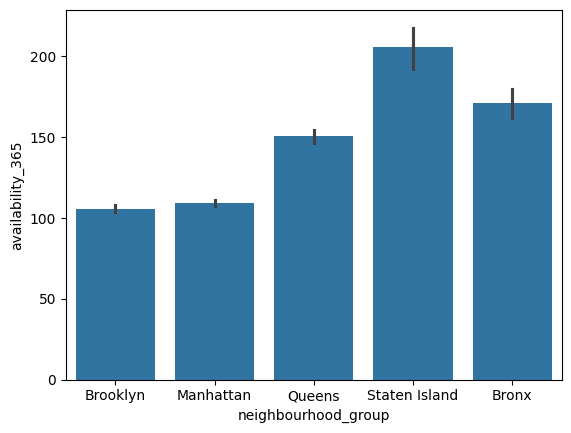

In [ ]:
# analzing neighbourhood and avaibility 365 and you can see staten island have higher avaibility
sns.barplot(x='neighbourhood_group',y='availability_365',data=airbnb)
xlabel='neighbourhood_group'
ylabel='availability_365'
plt.show()

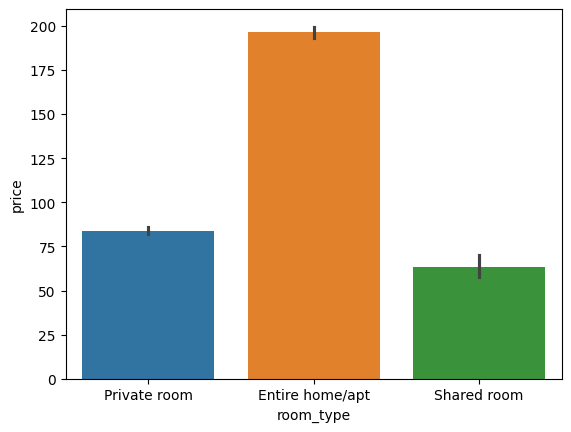

In [ ]:
#analysing room_type and price
sns.barplot(x='room_type',y='price',hue='room_type',data=airbnb)
xlabel='room_type'
ylabel='price'
plt.show()
# conclusion Entire room type have higher price in all room type

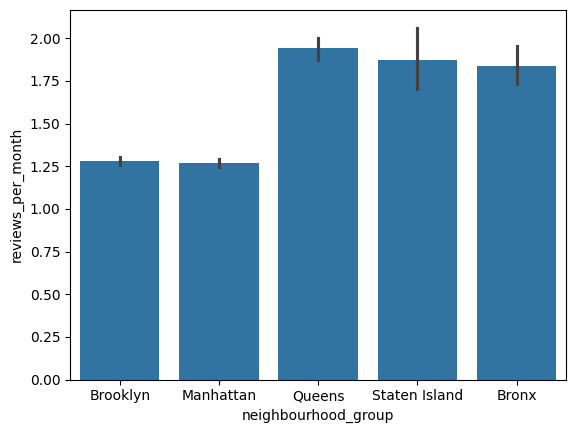

In [20]:
# neighbourhood monthly rating analysis
sns.barplot(x='neighbourhood_group',y='reviews_per_month',data=airbnb)
xlabel='neighbourhood_group'
ylabel='reviews_per_month'
plt.show()
# queens neighbourhood have highest monthly so user can book hotel in queens neighbouhood if someone looking for review criteria

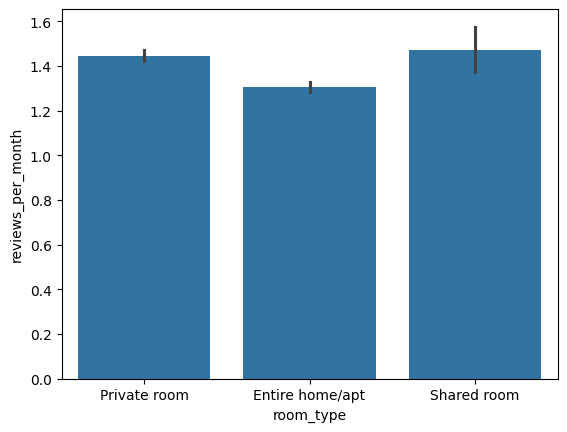

In [22]:
# room type  and review per month
sns.barplot(x='room_type',y='reviews_per_month',data=airbnb)
xlabel='room_type'
ylabel='reviews_per_month'
plt.show()
# shared room have highest monthly review count

In [ ]:
#plotting dataset on map
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr
Long=-73.80
Lat=40.80
locations = list(zip(airbnb.latitude, airbnb.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1


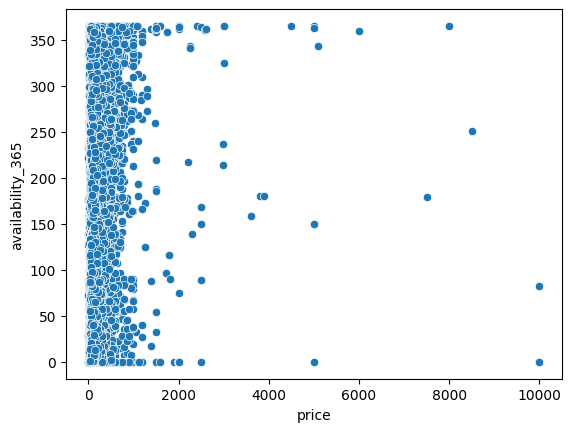

In [ ]:
# showing realtion b/w price and  avaibility
sns.scatterplot(x='price',y='availability_365',data=airbnb)
plt.show()
# you can see that price betwwen 0 to 2000 have highest avaibility

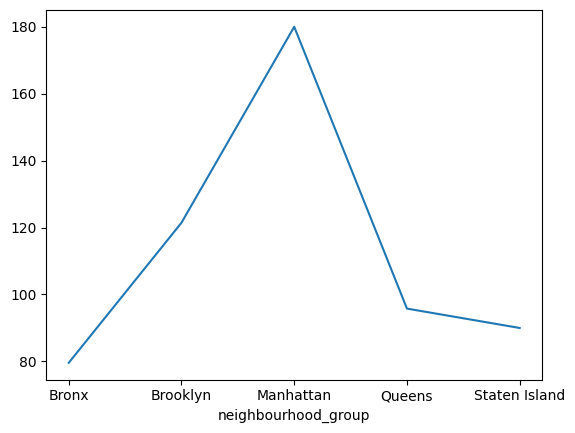

In [26]:
# average price for neighbourhood
avg=airbnb.groupby('neighbourhood_group')['price'].mean()
avg
# showing throgh line graph
sns.lineplot(x=avg.index,y=avg.values)
xlabel='neighbourhood_group'
ylabel='average_price'
plt.show()
# you can see mahanttam has higher avg price and bronx have lowest

In [27]:
#Find the most common room type among Airbnb listings.
most_common_room_type = airbnb['room_type'].mode().iloc[0]
print(f'Most Common Room Type: {most_common_room_type}')

Most Common Room Type: Entire home/apt


In [33]:
#Calculate the average number of reviews per month for listings with reviews.
avg_review = airbnb[airbnb['reviews_per_month'].notnull()]['reviews_per_month'].mean()
print(f'Average Reviews per Month for Listings with Reviews: {avg_review:.2f}')



Average Reviews per Month for Listings with Reviews: 1.37


Top Neighborhoods by Listing Count:
neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
East Village          1490
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
Name: count, dtype: int64


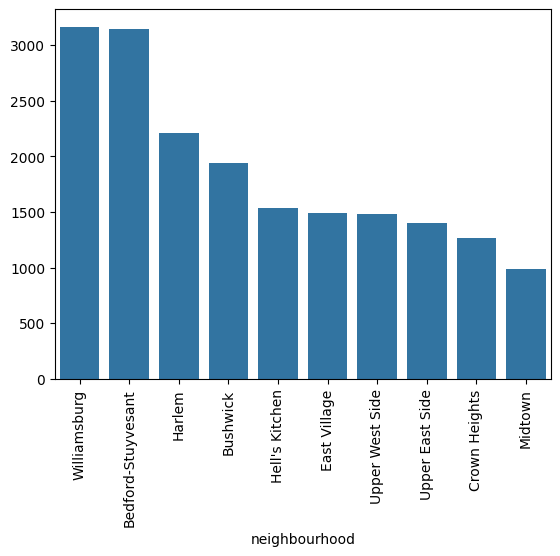

In [36]:
top_neighborhoods = airbnb['neighbourhood'].value_counts().head(10)
print('Top Neighborhoods by Listing Count:')
print(top_neighborhoods)
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values)
plt.xticks(rotation=90)
plt.show()


           latitude  longitude     price
latitude   1.000000   0.088152  0.031318
longitude  0.088152   1.000000 -0.155361
price      0.031318  -0.155361  1.000000


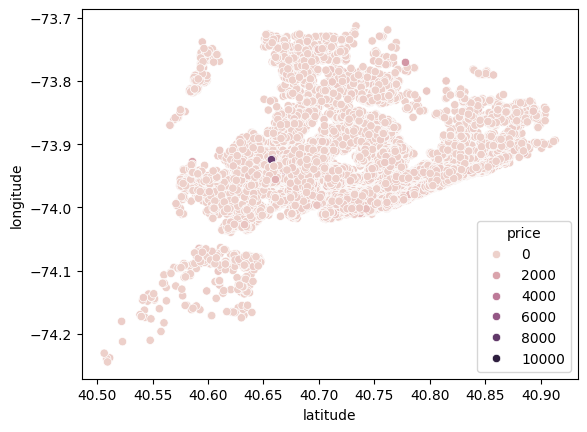

In [39]:
# Is there a correlation between latitude and longitude with price?
correlation = airbnb[['latitude', 'longitude', 'price']].corr()
print(correlation)
sns.scatterplot(x='latitude', y='longitude', hue='price', data=airbnb)
plt.show()

Availability Over Time:
last_review
2011-03      0.000000
2011-04    189.000000
2011-05     60.000000
2011-09    123.000000
2011-12      0.000000
              ...    
2019-03    117.321951
2019-04    121.729396
2019-05    152.209088
2019-06    155.602651
2019-07    151.433651
Freq: M, Name: availability_365, Length: 92, dtype: float64


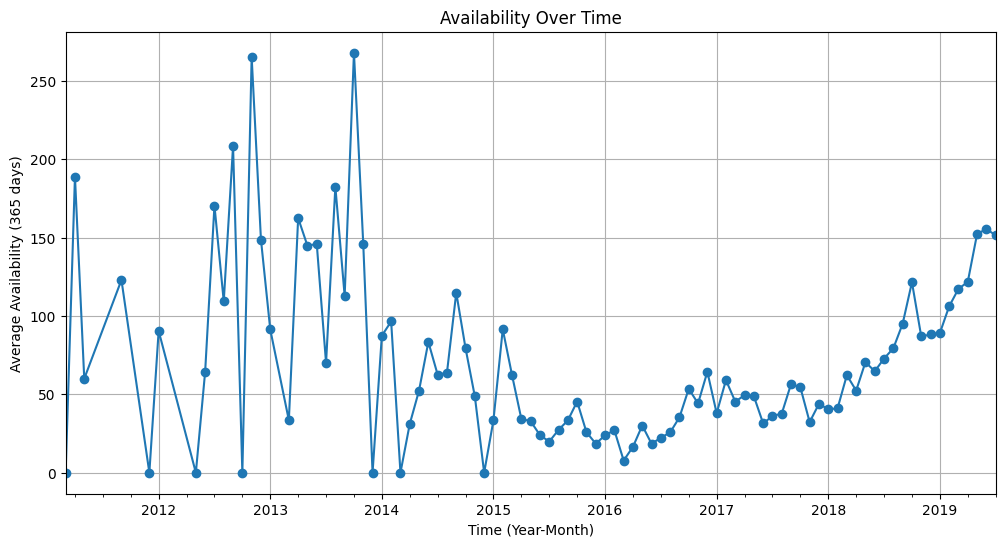

In [45]:
 #How has the availability of listings changed over time?
 airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])
# Group by year and month
availability_over_time = airbnb.groupby(airbnb['last_review'].dt.to_period("M"))['availability_365'].mean()
print('Availability Over Time:')
print(availability_over_time)
plt.figure(figsize=(12, 6))
availability_over_time.plot(kind='line', marker='o')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Availability (365 days)')
plt.title('Availability Over Time')
plt.grid(True)
plt.show()

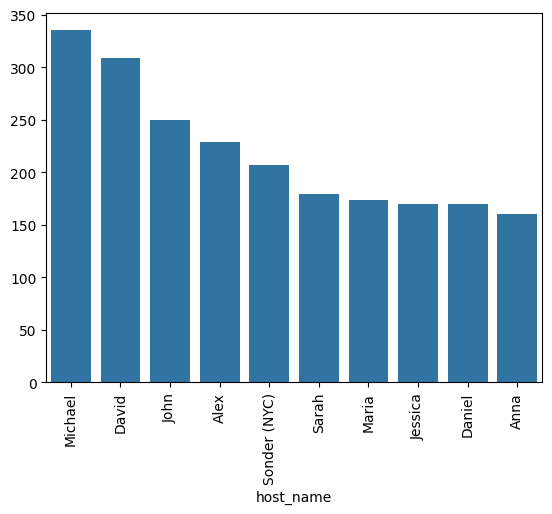

In [47]:

#Who are the top 10 hosts with the most listings?
sns.barplot(x=airbnb['host_name'].value_counts().head(10).index, y=airbnb['host_name'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.show()


In [55]:
# saving file using to_csv

In [53]:
airbnb.to_csv('"R:\almabetter\Python\c project\python2"')